<a href="https://colab.research.google.com/github/rprasetya/Project-Akhir-Data-Mining/blob/main/Project_Akhir_DATMIN_Kelompok_B1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Akhir Data Mining
## Kelompok : B1_3
### Anggota Kelompok : 
- Ryanda Putra Nasrullah (2109116053)
- Aji Arinda Zahra (2109116049)
- Namira Aida Hairunnisa (2109116048)
- Raya Prasetya (2109116059)

#Credit Card Customer Data (unsupervised)

## Bussines Understanding

Dari sisi business understanding, dataset ini dapat digunakan untuk memahami perilaku dan karakteristik pelanggan yang memiliki kartu kredit. Informasi ini dapat digunakan untuk mengidentifikasi pelanggan setia dan melakukan segmentasi pelanggan berdasarkan perilaku penggunaan kartu kredit mereka. Selain itu, dataset ini juga dapat digunakan untuk mengembangkan strategi pemasaran berorientasi target yang efektif dan meningkatkan kualitas layanan perbankan untuk pelanggan.

## Data Understanding

1. Sl_No: Nomor urut setiap baris data, tidak relevan dengan analisis data.

2. Customer Key: Kode unik untuk setiap pelanggan, bisa digunakan sebagai identifikasi pelanggan.

3. Avg_Credit_Limit: Rata-rata jumlah kredit yang disetujui untuk setiap pelanggan. Informasi ini dapat digunakan untuk menentukan besaran kredit yang dapat diberikan pada setiap pelanggan berdasarkan profil risiko dan keuangan mereka.

4. Total_Credit_Cards: Jumlah kartu kredit yang dimiliki oleh setiap pelanggan. Informasi ini dapat digunakan untuk mengidentifikasi pelanggan yang memiliki lebih banyak kartu kredit, yang dapat menunjukkan potensi pengeluaran yang lebih tinggi dan tingkat kepercayaan diri yang lebih tinggi dalam menggunakan produk kartu kredit.

5. Total_visits_bank: Jumlah kunjungan pelanggan ke bank dalam setahun. Informasi ini dapat digunakan untuk mengetahui perilaku pelanggan yang cenderung mengunjungi bank secara fisik.

6. Total_visits_online: Jumlah kunjungan pelanggan ke website bank dalam setahun. Informasi ini dapat digunakan untuk mengetahui perilaku pelanggan yang cenderung menggunakan layanan perbankan online.

7. Total_calls_made: Jumlah panggilan yang dilakukan oleh bank ke pelanggan selama setahun. Informasi ini dapat digunakan untuk mengetahui perilaku pelanggan dalam berinteraksi dengan bank melalui panggilan telepon dan menilai tingkat kepuasan pelanggan dengan layanan bank.

## Explore Data

       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000   

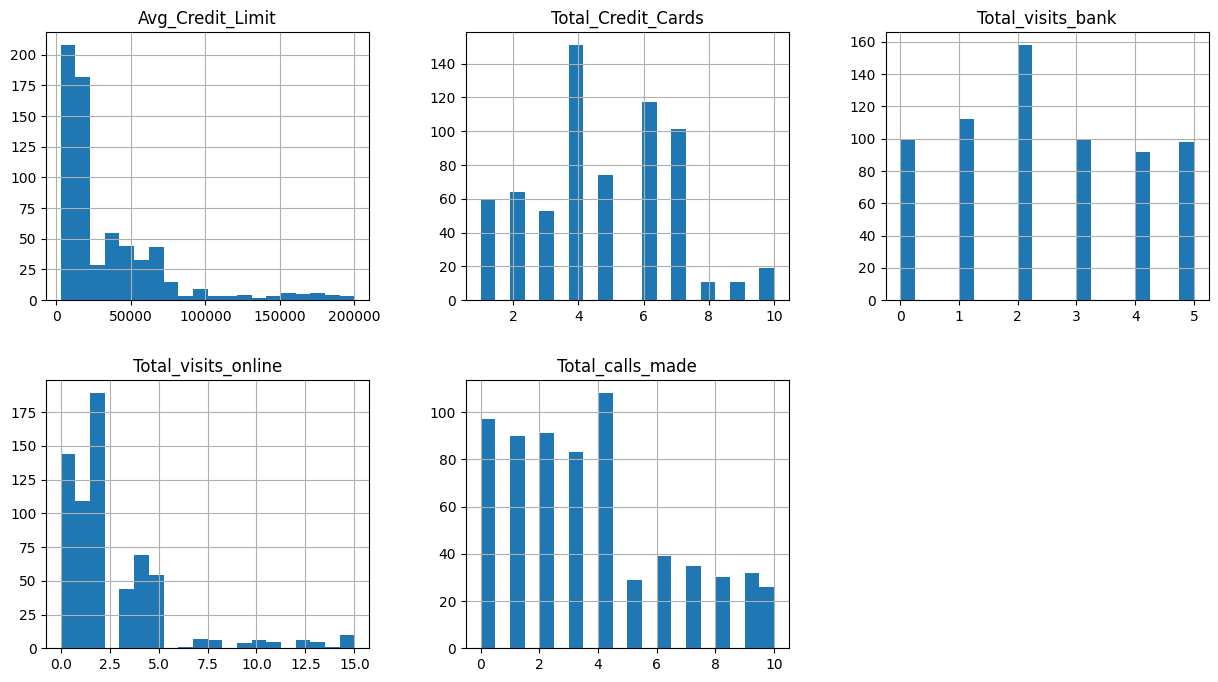

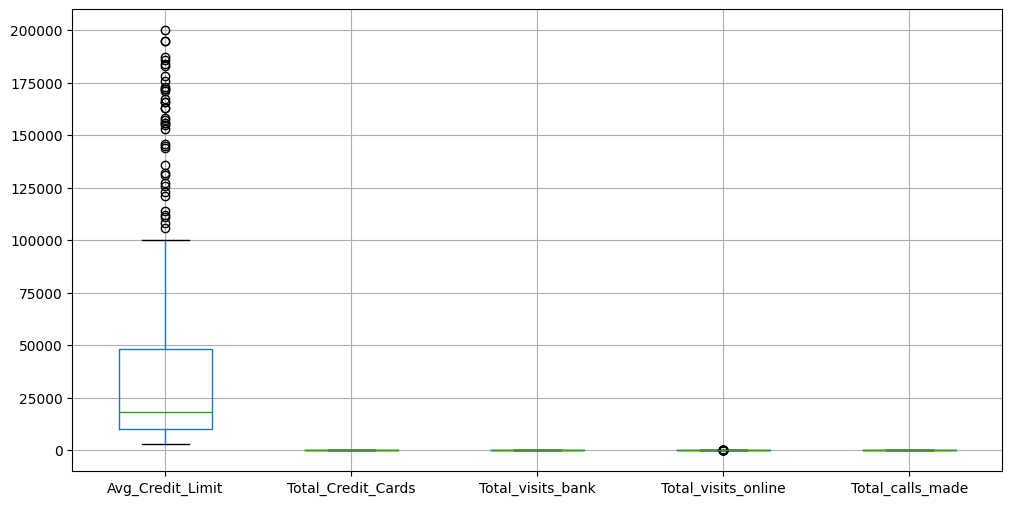

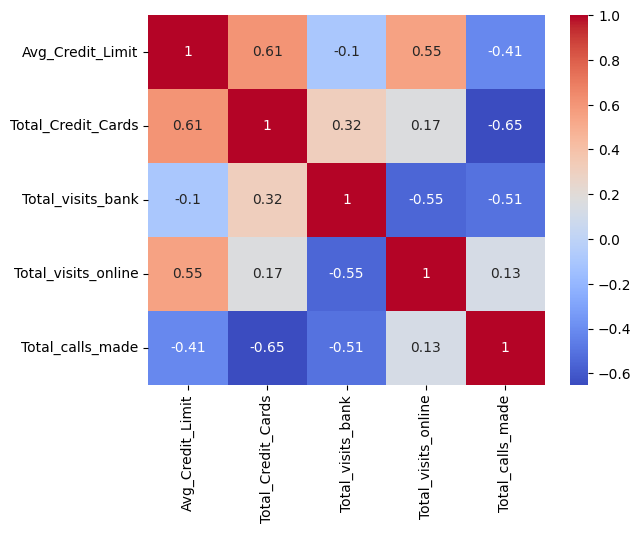

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/rprasetya/Project-Akhir-Data-Mining/main/Credit%20Card%20Customer%20Data/Credit%20Card%20Customer%20Data.csv"
df = pd.read_csv(url)

# Select columns of interest
df_select = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

# Summary statistics
summary = df_select.describe()
print(summary)

# Histograms
df_select.hist(layout=(2,3), figsize=(15, 8), bins=20)
plt.show()

# Box plots
df_select.boxplot(figsize=(12,6))
plt.show()

# Correlation matrix
corr = df_select.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## Data Preparation

Data Transformation

Select Data

In [ ]:
df.sample(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
311,312,91987,10000,6,3,0,0
652,653,28525,156000,8,1,8,0
124,125,69811,5000,2,2,3,7
362,363,71681,20000,5,5,2,1
478,479,74446,34000,6,3,2,1


#### Missing Value Check

In [ ]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### Bivariate Analysis

In [ ]:
df.groupby("Total_calls_made").describe()

Sl_No                                                       \
                  count        mean         std   min     25%    50%     75%   
Total_calls_made                                                               
0                  97.0  452.226804  147.887662   1.0  312.00  491.0  584.00   
1                  90.0  443.044444  134.928022   8.0  345.25  413.5  567.75   
2                  91.0  458.747253  141.047084   7.0  356.50  472.0  580.00   
3                  83.0  424.686747  111.477869   5.0  349.50  434.0  516.00   
4                 108.0  323.416667  172.707474   3.0  204.00  313.5  473.50   
5                  29.0  126.655172   62.875884  11.0   83.00  126.0  181.00   
6                  39.0  101.000000   55.291572  14.0   65.50   97.0  134.50   
7                  35.0  112.714286   65.112830  10.0   65.50  116.0  171.00   
8                  30.0  142.866667   61.461361   6.0   95.00  151.5  192.50   
9                  32.0  113.593750   65.404873   2.0   54.75  116.0  160.75   
10                 26.0  114.923077   68.936448  25.0   43.75  109.0  163.25   

                        Customer Key                ... Total_visits_bank  \
                    max        count          mean  ...               75%   
Total_calls_made                                    ...                     
0                 659.0         97.0  55700.484536  ...              4.00   
1                 658.0         90.0  54786.277778  ...              4.00   
2                 660.0         91.0  56287.241758  ...              4.00   
3                 612.0         83.0  53408.638554  ...              4.00   
4                 595.0        108.0  55674.638889  ...              4.00   
5                 226.0         29.0  55555.068966  ...              2.00   
6                 222.0         39.0  54983.846154  ...              2.00   
7                 219.0         35.0  46194.514286  ...              2.00   
8                 228.0         30.0  55462.400000  ...              2.00   
9                 225.0         32.0  60406.656250  ...              1.25   
10                224.0         26.0  58560.153846  ...              1.00   

                      Total_visits_online                                     \
                  max               count      mean       std  min  25%  50%   
Total_calls_made                                                               
0                 5.0                97.0  2.587629  4.094591  0.0  0.0  1.0   
1                 5.0                90.0  2.611111  3.728706  0.0  0.0  2.0   
2                 5.0                91.0  3.010989  4.290803  0.0  0.0  1.0   
3                 5.0                83.0  1.277108  1.475931  0.0  0.0  1.0   
4                 5.0               108.0  1.546296  1.506275  0.0  0.0  1.0   
5                 2.0                29.0  3.517241  1.242713  2.0  2.0  4.0   
6                 2.0                39.0  3.564103  1.071027  2.0  3.0  4.0   
7                 2.0                35.0  3.314286  1.131668  1.0  2.0  3.0   
8                 2.0                30.0  3.700000  1.178836  1.0  3.0  4.0   
9                 2.0                32.0  4.187500  1.446631  2.0  4.0  4.0   
10                2.0                26.0  3.269231  1.115623  2.0  2.0  3.0   

                             
                  75%   max  
Total_calls_made             
0                 2.0  15.0  
1                 2.0  15.0  
2                 2.0  15.0  
3                 2.0  12.0  
4                 2.0   5.0  
5                 5.0   5.0  
6                 4.0   5.0  
7                 4.0   5.0  
8                 5.0   5.0  
9                 5.0  10.0  
10                4.0   5.0  

[11 rows x 48 columns]

In [ ]:
# membuat variabel baru untuk dataset yang sudah di-update
df = df.drop(['Sl_No','Customer Key'], axis=1)

In [ ]:
import plotly.express as px

df_corr = pd.get_dummies(df).corr()

px.imshow(df_corr)

## Modelling

###### Preprocessing

In [ ]:
# Untuk Clustering
from sklearn.cluster import KMeans

# Untuk scalling dan normalisasi
from sklearn.preprocessing import StandardScaler

# Metric Pengukuran
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [ ]:
# PreProcessing
# Encoding DataTraining
X_train = pd.get_dummies(df,drop_first=True)

In [ ]:
# Creating a class to handle clustering
class Cluster:
    
    # Pada constructor terjadi beberapa proses
    # 1. Membuat normalisasi data
    def __init__(self,train):
        self.train = train
        self.scaled = StandardScaler().fit_transform(self.train)
        self.clusters = None
        self.name = None
        self._label = None

    # Method apply adalah fungsi kedua yang harus dijalankan
    # Method apply akan menerima argumen tambahan sebagai argumen untuk 
    # algoritma cluster yang akan digunakan
    def apply(self,cluster_algo,**kwargs):
        agg_cluster = cluster_algo(**kwargs)


        self.clusters = agg_cluster.fit(self.scaled) #Set Value
        self._label = self.clusters.labels_ #Set value

        # Mengambil nama algoritma clusternya
        self.name = type(self.clusters).__name__

        return self
    
    # Df untuk membuat dataframe
    def df(self,normalized=False):

        if normalized:
            X = pd.DataFrame(self.scaled,columns=self.train.columns)
        else:
            X = self.train.copy(deep=True)
        
        X["Cluster"] = self._label
        X["Cluster"] = X['Cluster'].astype(object)

        return X
    # Untuk Mendapatkan cluster ke N
    def get_cluster(self,n,normalized=False):
        df = self.df(normalized)
        
        return df[df["Cluster"] == n]

    # Plot untuk membuat scatterplot 
    def plot(self,X,Y,normalized=False):
        return px.scatter(self.df(normalized), x=X, y=Y, color="Cluster")

    # Plot 3d untuk membuat scatterplot 3d
    def plot_3d(self,X,Y,Z,normalized=False):
        return px.scatter_3d(self.df(normalized), x=X, y=Y,z=Z, color="Cluster")

    # menggunakan decorator property untuk mengonversi method menjadi property
    @property
    def metric(self): #Method ini berfungsi untuk mengambil hasil pengukuran berdasrkan metric ...
        label = self._label
        # Ini metric yang digunakan 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'
        
        return [silhouette_score(self.scaled,label),davies_bouldin_score(self.scaled,label),calinski_harabasz_score(self.scaled,label)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

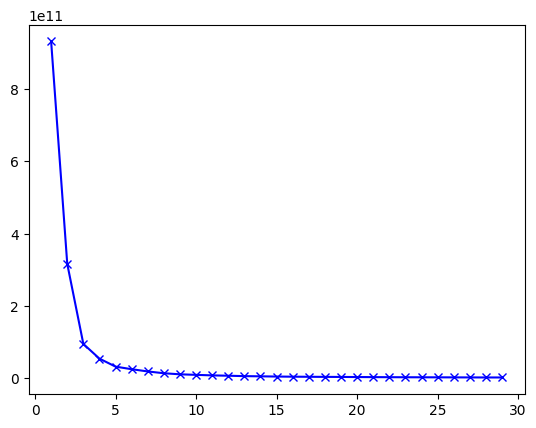

In [ ]:
sse = [] #Daftar SSE
K = range(1,30) #Banyak Cluster hingga 30
# Perulangan hingga 30 Cluster
for k in K:
    kmeans = KMeans(n_clusters= k,random_state=42).fit(X_train)
    #Mendapatkan SSE dan append ke list sse
    sse.append(kmeans.inertia_)

# Membuat plot K terhadap SSE
plt.plot(K,sse, "bx-")


##### Modelling

In [ ]:
# Pertama-tama kita perlu menerapkan algoritma KMeans kedalam kelas Cluster
#n_cluster adalah banyak clusternya
kmeans = Cluster(X_train).apply(KMeans,n_clusters=5,random_state=42) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Untuk menampilkan dataframe
kmeans.df().head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,4


In [ ]:
# Menampilkan plot berdasarkan dataframe dan 3 variabel x,y,z
kmeans.plot_3d("Avg_Credit_Limit","Total_Credit_Cards","Total_calls_made")

## Evaluation

In [ ]:
# Algorita yang dipakai
algo = [kmeans]

# Untuk menampung hasil metrik (bentuk list dari list metrics ini adalah nested list)
metrics = [i.metric for i in algo]

# Nama dari setiap algo menjadi indexnya
index = [i.name for i in algo]

# Penamaan Kolomnya
df_metric = pd.DataFrame(metrics, index=index, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])

def _color_pink(df):
      return 'background-color: pink; color:black'

In [ ]:
df_metric.style.applymap(_color_pink)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
KMeans,0.272690,1.335206,603.174425


#### Analisis Cluster

In [ ]:
# Pertama kita perlu membuat fungsi plot untuk plotting cluster
def plot_cluster(cluster_df):
    plot, ax = plt.subplots(2,4,figsize=(30,7),constrained_layout = True)
    sns.countplot(data=cluster_df,x="Avg_Credit_Limit",ax=ax[1][3])
    for i,col in enumerate(cols):
        sns.histplot(data=cluster_df,x=col,ax=ax[0][i],kde=True)
        sns.boxplot(data=cluster_df,x=col,ax=ax[1][i])

In [ ]:
cols = ["Avg_Credit_Limit","Total_Credit_Cards","Total_calls_made"]

In [ ]:
cluster1 = kmeans.get_cluster(0)
cluster2 = kmeans.get_cluster(1)
cluster3 = kmeans.get_cluster(2)
cluster4 = kmeans.get_cluster(3)
cluster5 = kmeans.get_cluster(4)


In [ ]:
cluster1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
1,50000,3,0,10,9,0
5,20000,3,0,1,8,0
9,3000,4,0,1,7,0
11,13000,3,0,2,7,0
12,11000,1,2,5,9,0


In [ ]:
cluster2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,100000,2,1,1,0,1
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
228,10000,7,2,0,0,1
229,8000,7,2,1,4,1


In [ ]:
cluster3.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
10,10000,4,0,5,5,2
13,9000,1,1,5,6,2
14,6000,2,2,4,6,2


In [ ]:
cluster4.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
230,17000,4,5,0,2,3
232,20000,5,4,1,0,3
234,16000,6,5,0,4,3
235,13000,7,4,0,0,3
236,8000,7,5,2,3,3


In [ ]:
cluster5.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
4,100000,6,0,12,3,4
6,100000,5,0,11,2,4
612,157000,9,1,14,1,4
613,94000,9,1,11,0,4
614,163000,8,1,7,1,4


In [ ]:
cluster1.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,12551.401869,2.476636,0.766355,3.691589,8.607477
std,5736.729798,1.160236,0.784032,1.276871,1.043913
min,3000.000000,1.000000,0.000000,1.000000,7.000000
25%,8000.000000,1.000000,0.000000,3.000000,8.000000
50%,12000.000000,2.000000,1.000000,4.000000,9.000000
75%,16000.000000,4.000000,1.000000,5.000000,9.000000
max,50000.000000,4.000000,2.000000,10.000000,10.000000


In [ ]:
cluster2.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,36260.204082,5.551020,2.494898,0.954082,2.061224
std,22430.945839,1.142399,0.531060,0.836926,1.452258
min,5000.000000,2.000000,1.000000,0.000000,0.000000
25%,16000.000000,5.000000,2.000000,0.000000,1.000000
50%,35000.000000,6.000000,3.000000,1.000000,2.000000
75%,56000.000000,7.000000,3.000000,2.000000,3.000000
max,100000.000000,7.000000,3.000000,3.000000,4.000000


In [ ]:
cluster3.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,117.000000,117.000000,117.00000,117.000000,117.000000
mean,11829.059829,2.350427,1.08547,3.427350,5.282051
std,4758.459977,1.044825,0.79408,1.154573,1.135980
min,5000.000000,1.000000,0.00000,1.000000,1.000000
25%,8000.000000,1.000000,0.00000,2.000000,4.000000
50%,11000.000000,2.000000,1.00000,4.000000,5.000000
75%,16000.000000,3.000000,2.00000,4.000000,6.000000
max,20000.000000,4.000000,2.00000,5.000000,7.000000


In [ ]:
cluster4.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,31226.315789,5.478947,4.515789,1.010526,1.936842
std,21659.127922,1.139516,0.501071,0.878849,1.409045
min,5000.000000,4.000000,4.000000,0.000000,0.000000
25%,12000.000000,4.000000,4.000000,0.000000,1.000000
50%,28000.000000,6.000000,5.000000,1.000000,2.000000
75%,47000.000000,6.000000,5.000000,2.000000,3.000000
max,75000.000000,7.000000,5.000000,2.000000,4.000000


In [ ]:
cluster5.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,141040.000000,8.740000,0.600000,10.900000,1.080000
std,34457.877272,1.274715,0.494872,2.880264,0.876915
min,84000.000000,5.000000,0.000000,6.000000,0.000000
25%,108750.000000,8.000000,0.000000,8.000000,0.000000
50%,145500.000000,9.000000,1.000000,11.000000,1.000000
75%,170000.000000,10.000000,1.000000,13.000000,2.000000
max,200000.000000,10.000000,1.000000,15.000000,3.000000


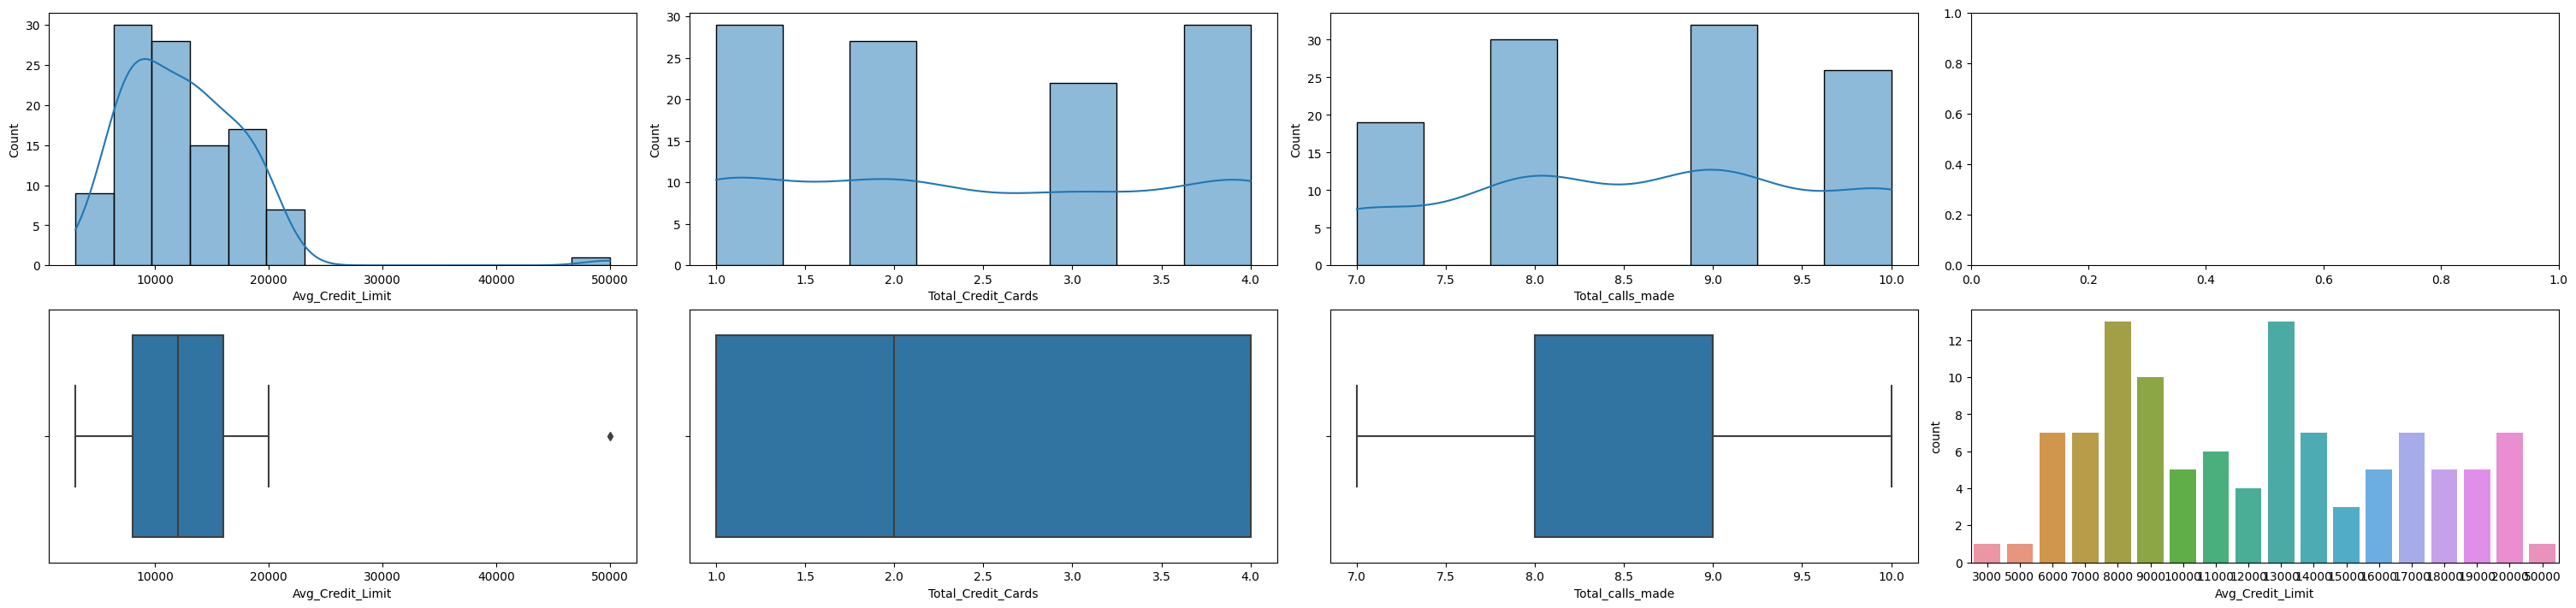

In [ ]:
plot_cluster(cluster1)

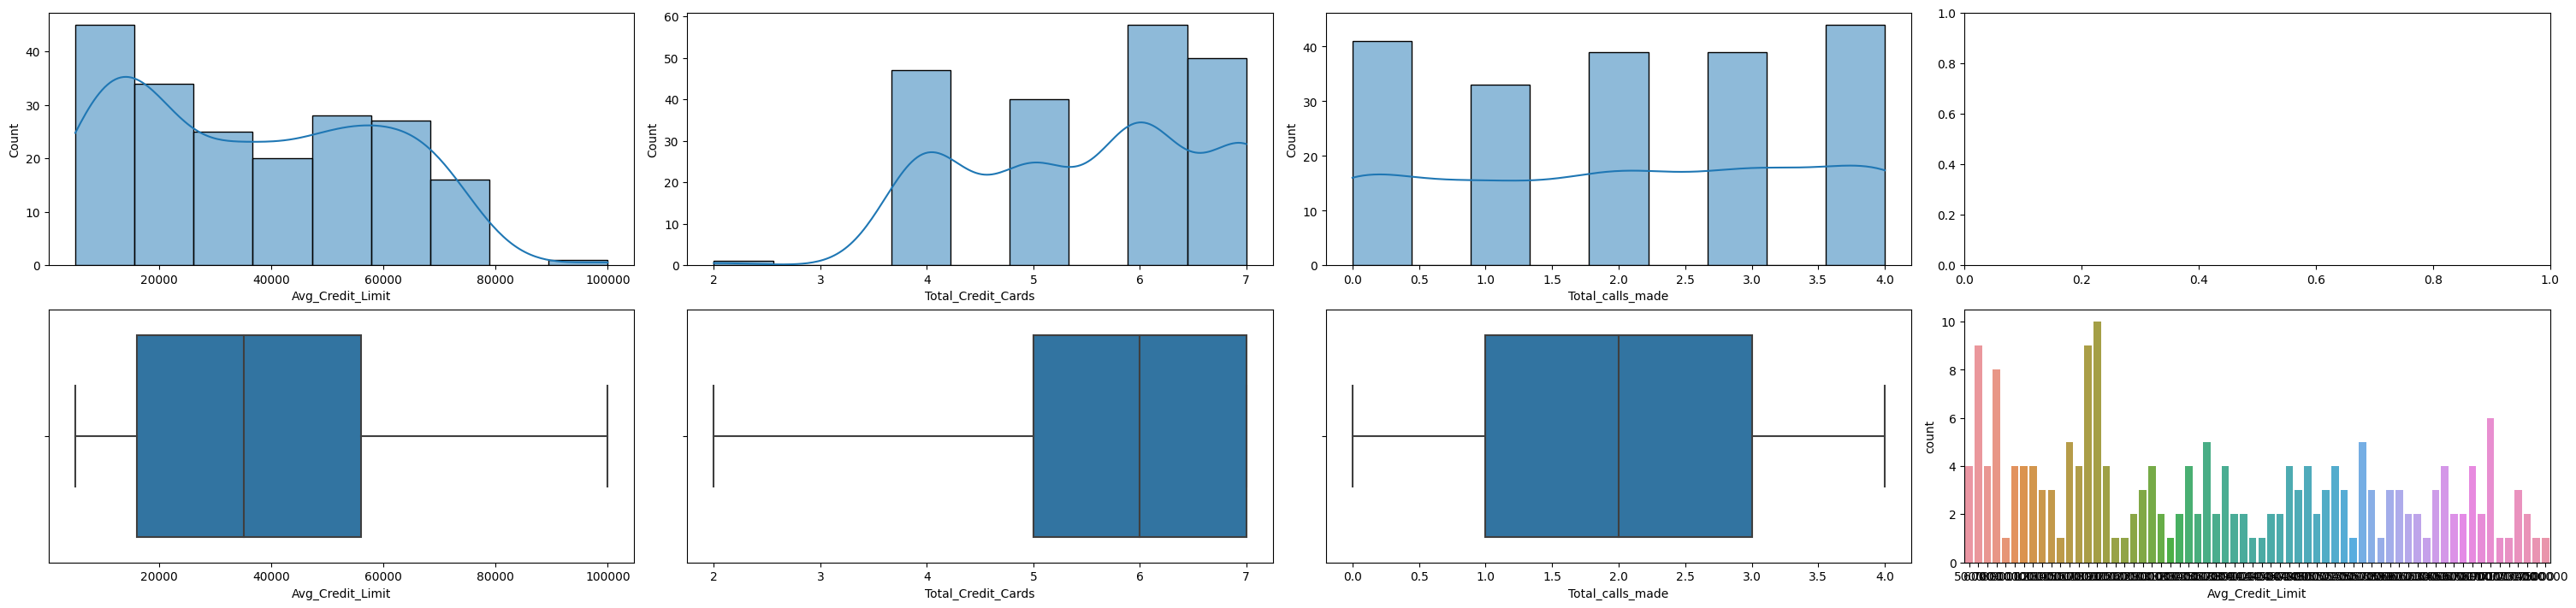

In [ ]:
plot_cluster(cluster2)


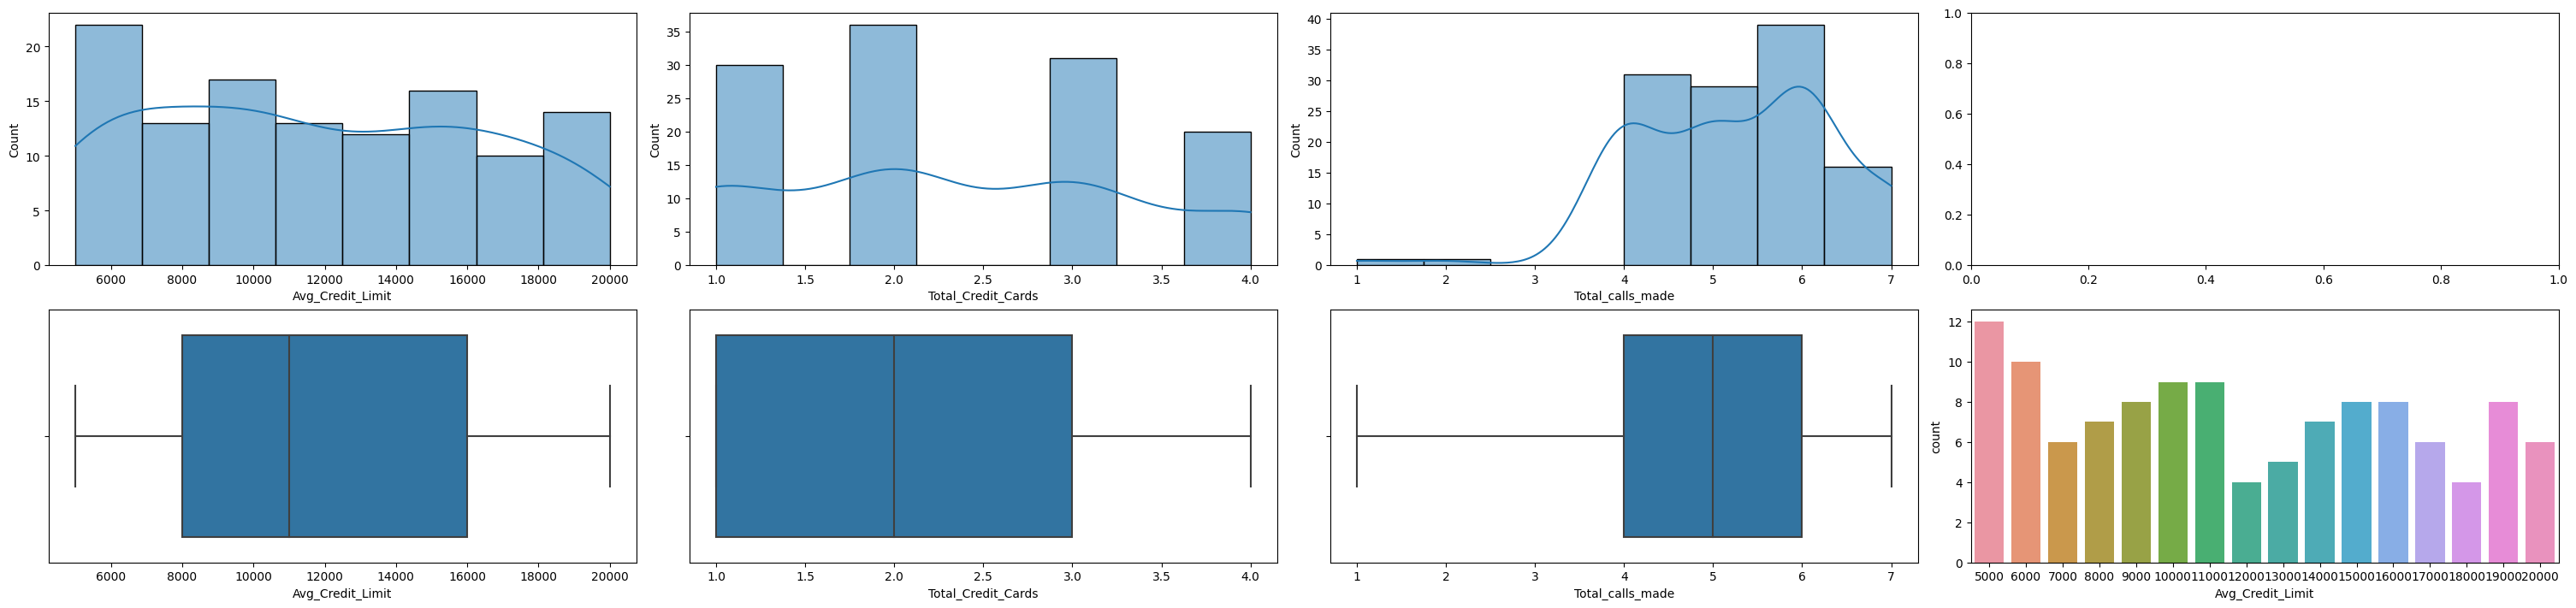

In [ ]:
plot_cluster(cluster3)


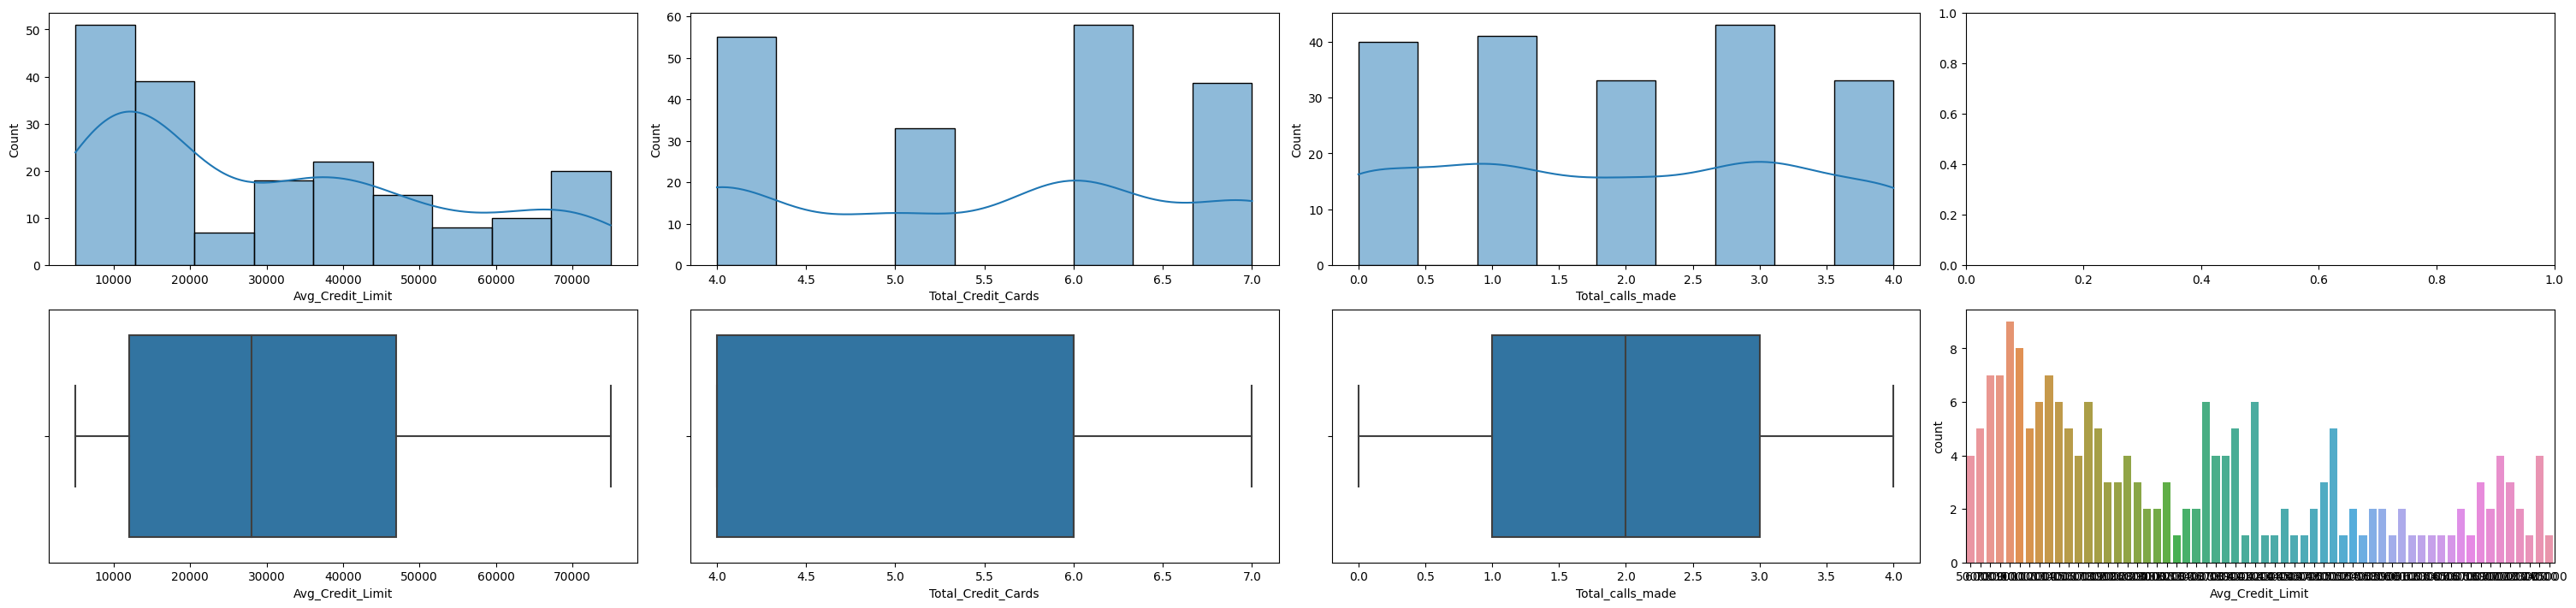

In [ ]:
plot_cluster(cluster4)


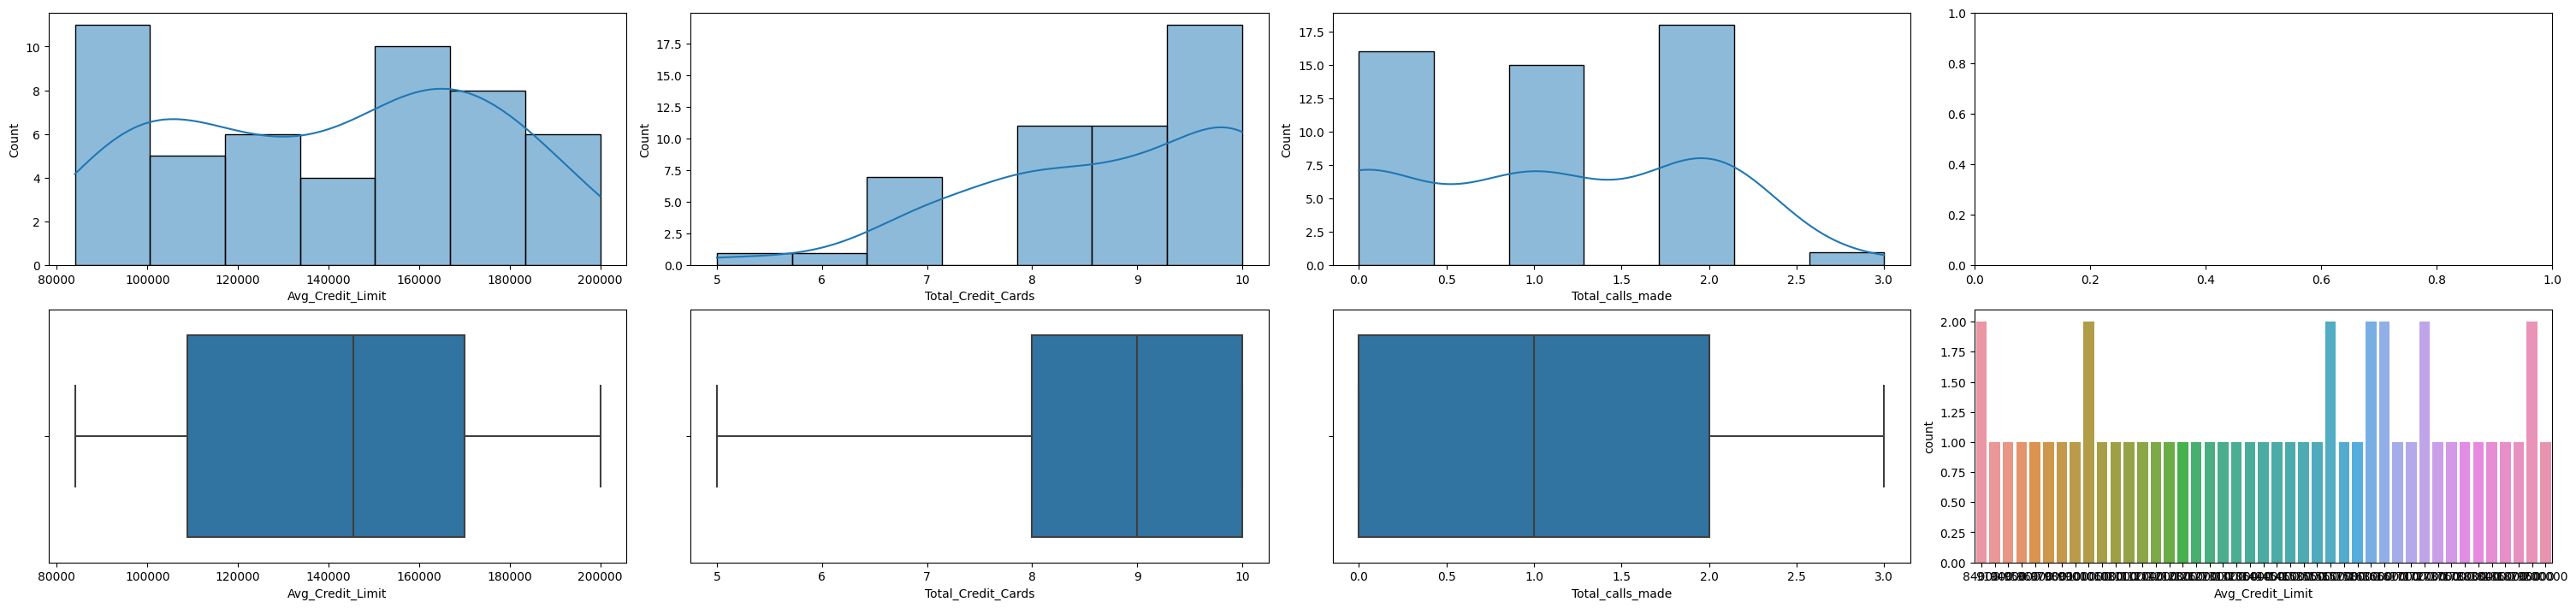

In [ ]:
plot_cluster(cluster5)


## Deployment

In [ ]:
df.to_csv('Unsupervised - Deployment.csv')

# Housing In London (Supervised) 

## Bussiness Understanding 

Housing in London adalah dataset yang berisi data pembelian rumah di London. Dataset ini cocok digunakan untuk menganalisis eksplorasi data yang luas dan dapat menjadi indikator untuk memprediksi kenaikan harga rumah selanjutnya. Informasi yang diberikan dalam dataset ini valid dan didukung oleh berbagai macam penelitian lainnya. Dalam bussiness understanding, dataset ini membantu untuk memahami pasar properti di London dengan memberikan informasi tentang pembelian rumah di berbagai area.

## Data Understanding

1. Date : mengarah ke tanggal dibuatnya catatan. Data ini dapat digunakan untuk 
memprediksi kenaikan harga rumah selanjutnya kapan terjadi. 
2. Area : area dilakukannya catatan. Data area ini dapat digunakan untuk mengetahui area mana saja yang sudah banyak terjual, atau area mana yang harga rumahnnya naik. 
3. Average Price : harga rumah rata-rata. Data ini digunakan untuk mengetahui berapa perubahan harga yang kemungkinan akan terjadi.
4. Code : berisi kode unik dari area. Data ini hanya diperlukan apabila sekiranya tidak terdapat informasi lokasi area.
5. House sold : jumlah rumah terjual. Data ini sangat penting karena berisi keterangan banyaknya rumah terjual, data ini bisa menjadi acuan bagaimana client lain bisa membedakan kualitas dari rumah tersebut.
6. No of crimes : jumlah kejahatan. Data ini sangat penting karena client bisa membandingkan lokasi mana yang memiliki tingkat kejahatan tinggi atau rendah. 
7. Borough flag : wilayah rumah. Data ini tidak terlalu penting karena data ini hanya berisi bahwa rumah tersebut berada di London, padahal dari kolom area saja sudah diberi kejelasan lokasi.

## Import Library

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

## Data Prepariton

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NamiraAidaHairunnisa/PA-DATA-MINING/main/housing_in_london_yearly_variables.csv ')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [ ]:
df.isna().sum()

code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

### Eksplore Data

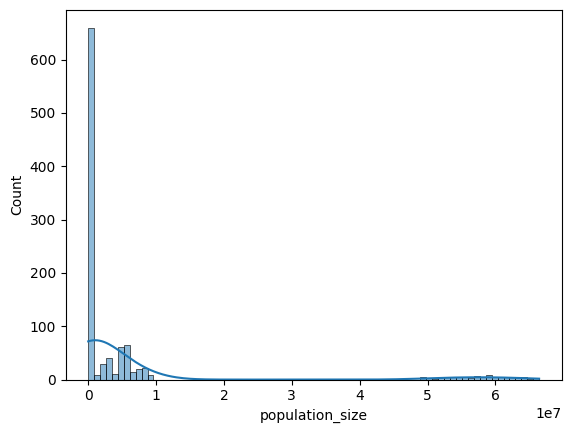

In [ ]:
import seaborn as sns

sns.histplot(df['population_size'], kde=True)
plt.show()

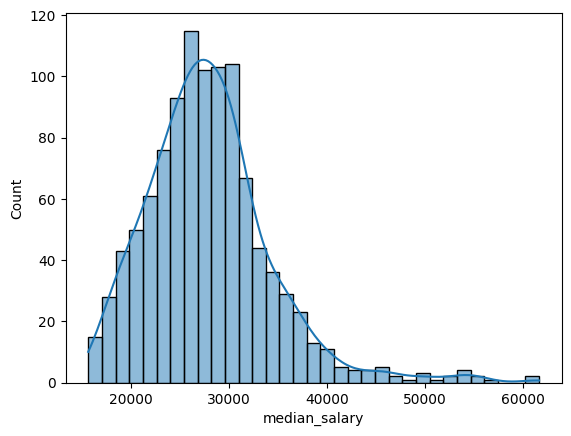

In [ ]:
sns.histplot(df['median_salary'], kde=True)
plt.show()

<ipython-input-108-6522c2b4e5f9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



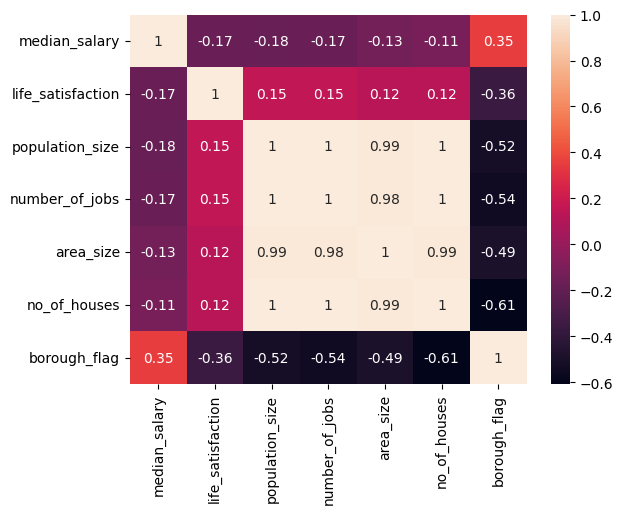

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Cleaning & Encoding

In [ ]:
df = df[~df.isin(['#','na','-']).any(axis=1)]
df['recycling_pct'] = df['recycling_pct'].astype(float)

<ipython-input-109-6b09b0282c84>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df['life_satisfaction'] = df['life_satisfaction'].fillna(df['life_satisfaction'].mean())
df['median_salary'] = df['median_salary'].fillna(df['median_salary'].mean())
df['number_of_jobs'] = df['number_of_jobs'].fillna(df['number_of_jobs'].mean())
df['area_size'] = df['area_size'].fillna(df['area_size'].mean())
df['no_of_houses'] = df['no_of_houses'].fillna(df['no_of_houses'].mean())
df['recycling_pct'] = df['recycling_pct'].fillna(df['recycling_pct'].mean())
df['population_size'] = df['population_size'].fillna(df['population_size'].mean())

<ipython-input-110-7ce0b3971bf6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-7ce0b3971bf6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-7ce0b3971bf6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-7ce

In [ ]:
df.isna().sum()

code                 0
area                 0
date                 0
median_salary        0
life_satisfaction    0
mean_salary          0
recycling_pct        0
population_size      0
number_of_jobs       0
area_size            0
no_of_houses         0
borough_flag         0
dtype: int64

In [ ]:
df[df.duplicated()]

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag


In [ ]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
median_salary,3.133903
life_satisfaction,33.238367
recycling_pct,0.000000
population_size,7.597341
number_of_jobs,7.217474
area_size,1.709402
no_of_houses,3.418803
borough_flag,0.000000


In [ ]:
cols = df.select_dtypes(include=['float64', 'int64'])

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    if col != 'borough_flag':
      if percent_outliers < 10:
        df = df[~((df[col] > upper_bound) | (df[col] < lower_bound))]
      outliers_after = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      percent_outliers_after = (len(outliers_after)/len(df))*100
      results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
median_salary,0.000000
life_satisfaction,33.333333
recycling_pct,0.000000
population_size,0.000000
number_of_jobs,0.000000
area_size,0.000000
no_of_houses,0.000000


In [ ]:
df = df.drop(['code','area','date'],axis=1)

In [ ]:
df['mean_salary'] = df['mean_salary'].astype(float)

## Modelling

### Cross Validation

In [ ]:
df2 = pd.get_dummies(df)

In [ ]:
from sklearn.model_selection import train_test_split
x = df2.drop('borough_flag',axis=1)
y = df2['borough_flag']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasinya:", grid_search.best_score_)


Nilai k terbaik: 3
Skor validasinya: 0.9913277232351566


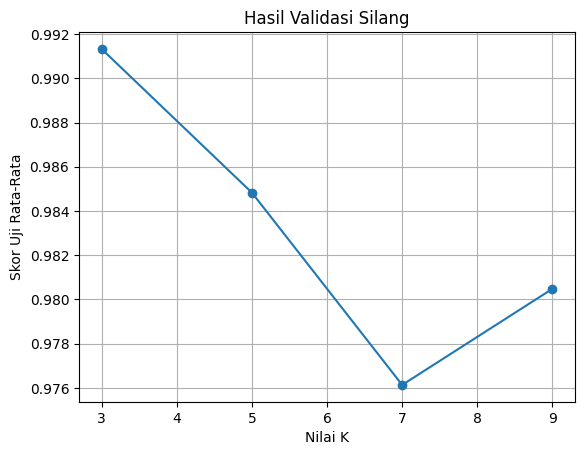

In [ ]:
import matplotlib.pyplot as plt
  
# ambil nilai skor validasi dari grid search
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# plot hasil dari grid search
plt.errorbar(
    [params[i]['n_neighbors'] for i in range(len(params))],
    mean_scores,
    fmt='o-'
)
plt.xlabel('Nilai K')
plt.ylabel('Skor Uji Rata-Rata')
plt.title('Hasil Validasi Silang')
plt.grid(True)
plt.show()

### Algo

#### Import Library

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

In [ ]:
# scaler = StandardScaler()

# # fit and transform the training data
# x_train_scaled = scaler.fit_transform(x_train)

# # convert the scaled training data to a Pandas DataFrame
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# # transform the testing data using the fitted scaler
# x_test_scaled = scaler.transform(x_test)

# # convert the scaled testing data to a Pandas DataFrame
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

#### GNB

In [ ]:
class NaiveBayes:
    # Constructor
    def __init__(self):
        self.sigmas = dict()
        self.dispersions = dict()
        self.probs = dict()
        self.index = None
        self.targets = None
        self.columns = None
    
    def fit(self, x, y):
        # Convert x to DataFrame
        x = pd.DataFrame(x, columns=self.columns)

        # Store the original index of x
        self.index = x.index

        # Preparing sigma / dispersion dictionaries for numeric columns
        self.sigmas = {}
        self.dispersions = {}
        for column in x.select_dtypes(include=[np.number]):
            self.sigmas[column] = {}
            self.dispersions[column] = {}
            for target in y.unique():
                sample = np.array(x[y.values == target][column])
                self.sigmas[column][target] = sample.std()
                self.dispersions[column][target] = sample.mean()
                self.probs[column] = len(sample) / len(x)

        self.targets = y.unique()
        self.columns = x.columns

    # Predict method
    def predict(self, X):
        predicts = list()
        for row in X.to_numpy():
            target_prob_dict = dict()
            for target in self.targets:
                for x, column in zip(row, self.columns):
                    x = float(x)
                    sigma = self.sigmas[column][target]
                    dispersion = self.dispersions[column][target]
                    prob = self.probs[column]
                    target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob

                    if target not in target_prob_dict:
                        target_prob_dict[target] = target_prob
                    else:
                        target_prob_dict[target] *= target_prob
                        
            # Get the predicted class based on the highest probability
            predicted_class = max(target_prob_dict, key=target_prob_dict.get)
            predicts.append(predicted_class)
        
        return predicts
    
    def print(self):
        print("Sigmas:")
        for column in self.sigmas:
            print(f"\t{self.columns[column]}")

In [ ]:
# create a Gaussian Naive Bayes object
gnb = NaiveBayes()

# train the model on the scaled training data
gnb.fit(x_train, y_train)

# make predictions on the scaled testing data
gnb_pred = gnb.predict(x_test)


#### KNN

In [ ]:
class KNeighbors:
    def __init__(self, n_neighbors=None):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_classes = self.y_train[indices]
            y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
        return y_pred

In [ ]:
# Mendefinisikan model KNN dengan k=15
knn = KNeighbors(n_neighbors=3)

# Melatih model knn
knn.fit(x_train, y_train)

# Percobaan pengujian prediksi
knn_pred = knn.predict(x_test)

#### C4.5

In [ ]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(x_train, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(x_test)

## Evaluation

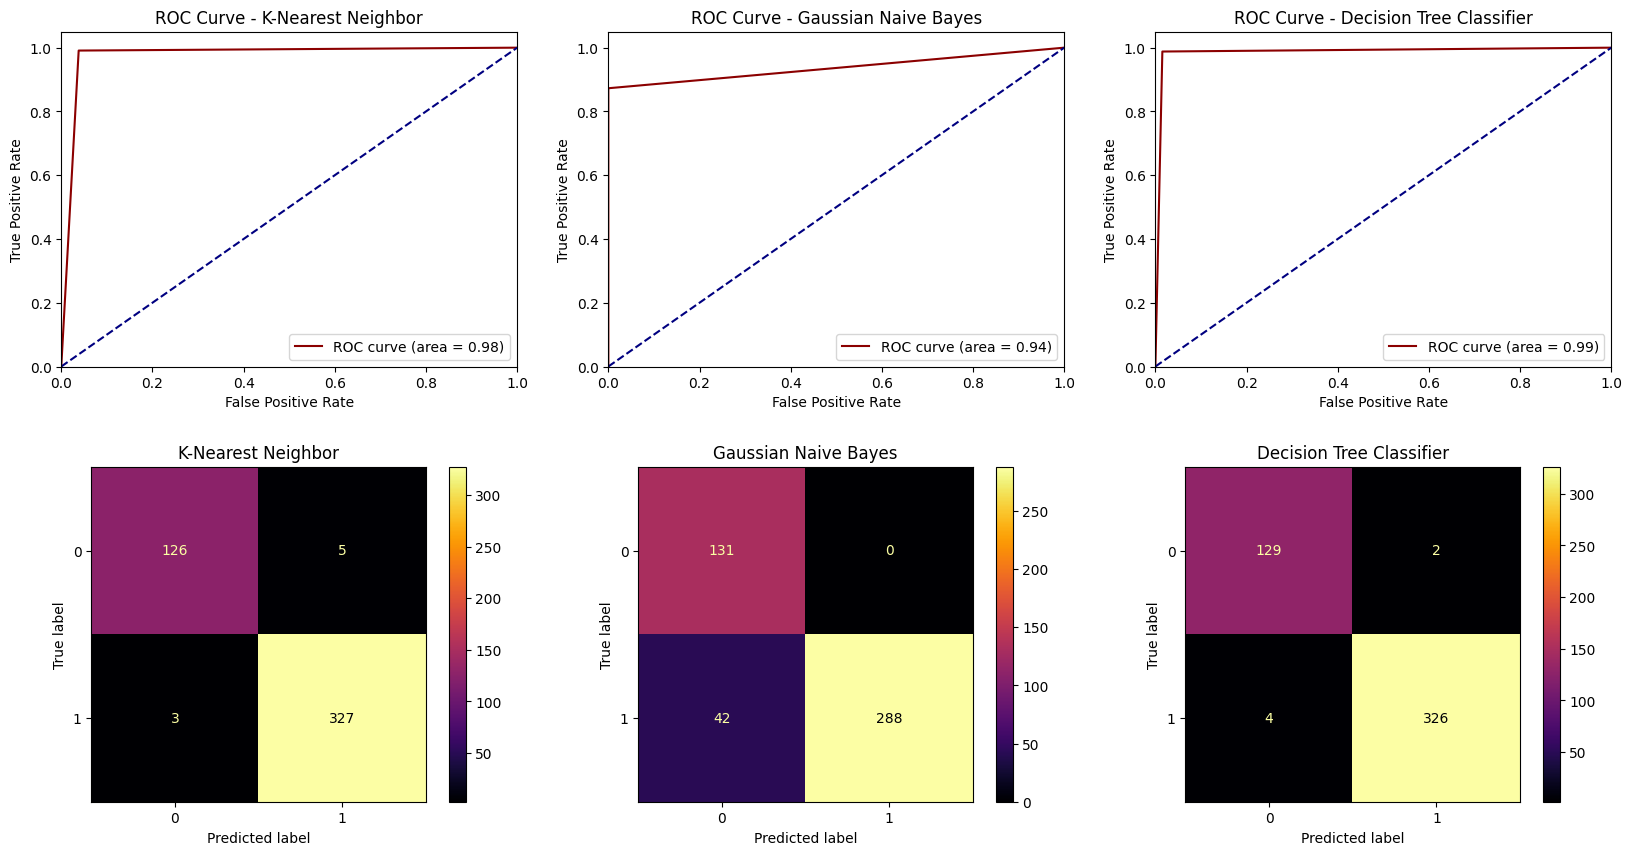

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,98.264642,98.493976,99.090909,97.637058,98.791541
Gaussian Naive Bayes,90.889371,100.000000,87.272727,93.636364,93.203883
Decision Tree Classifier,98.698482,99.390244,98.787879,98.630581,99.088146


In [ ]:
# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkred', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung akurasi, precision, recall, dan f1-score
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = (2 * pr * rc) / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

## Deployment

In [ ]:
df2.to_csv("supervised_deploy.csv")